# Train a MLR model on the event stream as output of the DVS
## Makes a training set

In [1]:
%load_ext autoreload
%autoreload 2

from aprovhots import fit_MLR, predict_data
from dataset_creation import Synthetic_Dataset
from HOTS.tools import score_classif_events, get_dataset_info, get_loader
from HOTS.network import network
import tonic #, os

path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
patch_size = (32,32)
max_duration = 1e3
date = '2022-01-03'
# we set tau_cla emprirically based on the ISI for SEA samples (see Make_dataset notebook)
tau_cla = 200*patch_size[0]*patch_size[1]*2

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------


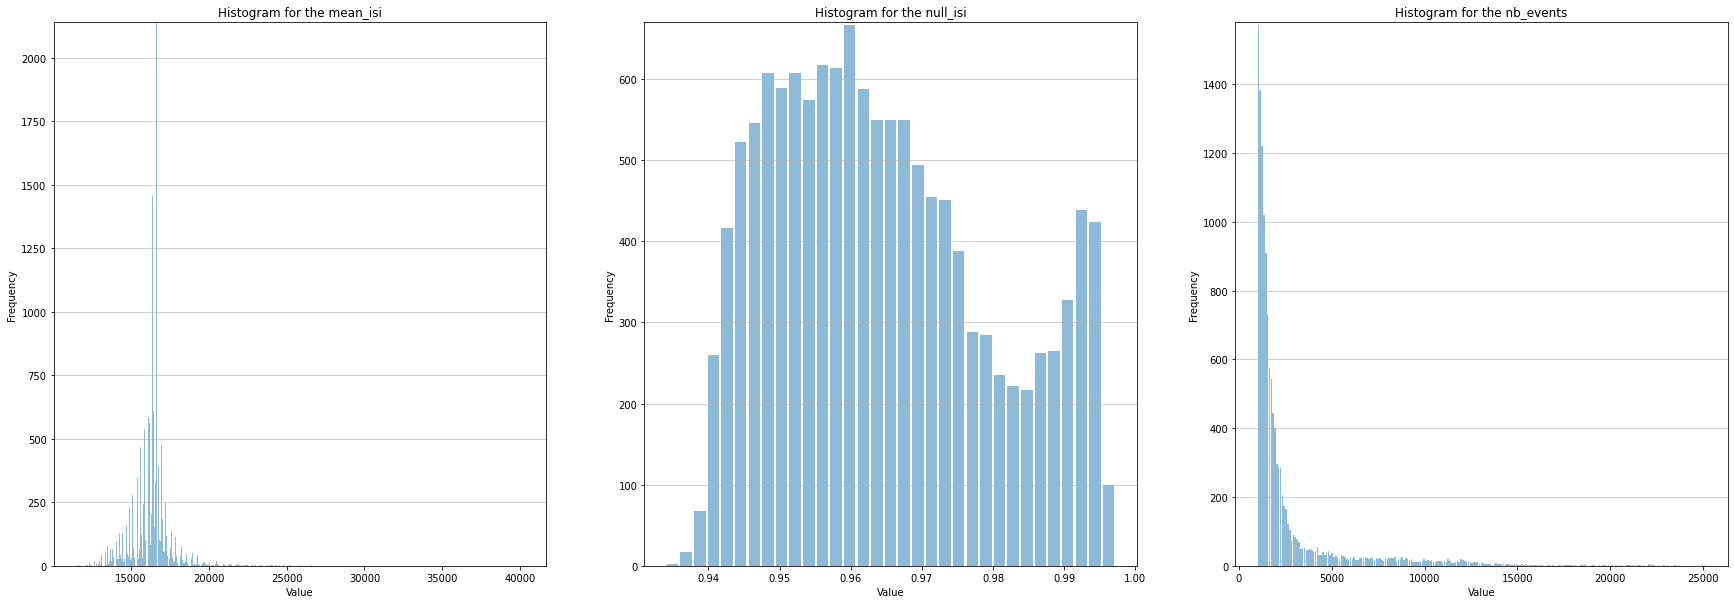

In [2]:
values = get_dataset_info(trainset, testset)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------


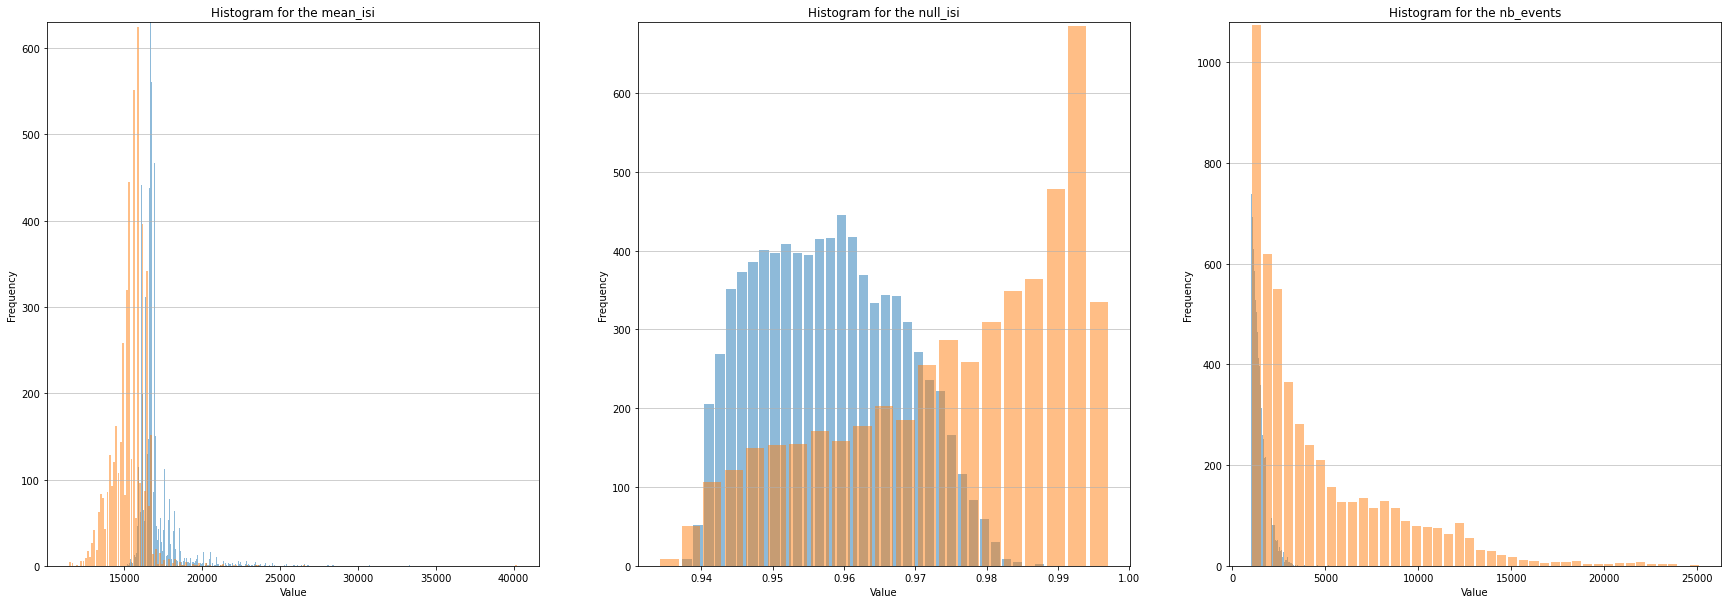

In [3]:
values = get_dataset_info(trainset, testset, distinguish_labels=True)

## Classification with MLR on raw events

In [4]:
kfold = 30
MLR_model, losses = fit_MLR(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

load existing model


In [5]:
likelihood, true_target = predict_data(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:19<00:00,  7.79it/s]


Mean accuracy: 69.5%


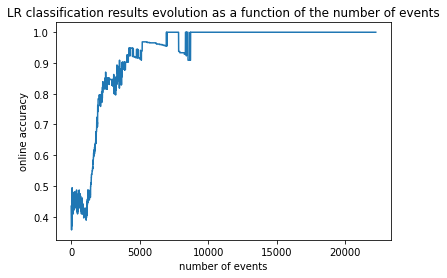

In [6]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target)

### Higher threshold

Mean accuracy: 72.6%


/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:346: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


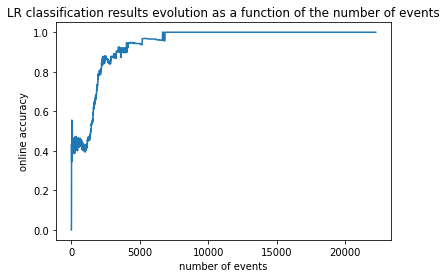

In [7]:
likelihood_threshold = .9
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target, thres=likelihood_threshold)